# Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/kepler_exoplanets.csv")
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Comprehensive Exploratory Data Analysis
## Kepler Exoplanet Detection Dataset

This dataset contains **9,564 Kepler Objects of Interest (KOIs)** with **50 features** including:
- **Target Variable**: `koi_disposition` (CONFIRMED, FALSE POSITIVE, CANDIDATE)
- **Orbital Parameters**: period, radius, semi-major axis, inclination, eccentricity
- **Stellar Properties**: effective temperature, surface gravity, stellar radius
- **Detection Metrics**: transit depth, duration, signal-to-noise ratio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Total KOIs: {len(df):,}")
print(f"Features: {df.shape[1]}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

DATASET OVERVIEW
Shape: (9564, 50)
Total KOIs: 9,564
Features: 50

Column names:
 1. rowid
 2. kepid
 3. kepoi_name
 4. kepler_name
 5. koi_disposition
 6. koi_pdisposition
 7. koi_score
 8. koi_fpflag_nt
 9. koi_fpflag_ss
10. koi_fpflag_co
11. koi_fpflag_ec
12. koi_period
13. koi_period_err1
14. koi_period_err2
15. koi_time0bk
16. koi_time0bk_err1
17. koi_time0bk_err2
18. koi_impact
19. koi_impact_err1
20. koi_impact_err2
21. koi_duration
22. koi_duration_err1
23. koi_duration_err2
24. koi_depth
25. koi_depth_err1
26. koi_depth_err2
27. koi_prad
28. koi_prad_err1
29. koi_prad_err2
30. koi_teq
31. koi_teq_err1
32. koi_teq_err2
33. koi_insol
34. koi_insol_err1
35. koi_insol_err2
36. koi_model_snr
37. koi_tce_plnt_num
38. koi_tce_delivname
39. koi_steff
40. koi_steff_err1
41. koi_steff_err2
42. koi_slogg
43. koi_slogg_err1
44. koi_slogg_err2
45. koi_srad
46. koi_srad_err1
47. koi_srad_err2
48. ra
49. dec
50. koi_kepmag


## Target Variable Analysis

KOI DISPOSITION DISTRIBUTION:
koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

Percentages:
koi_disposition
FALSE POSITIVE    52.52
CONFIRMED         23.98
CANDIDATE         23.50
Name: count, dtype: float64


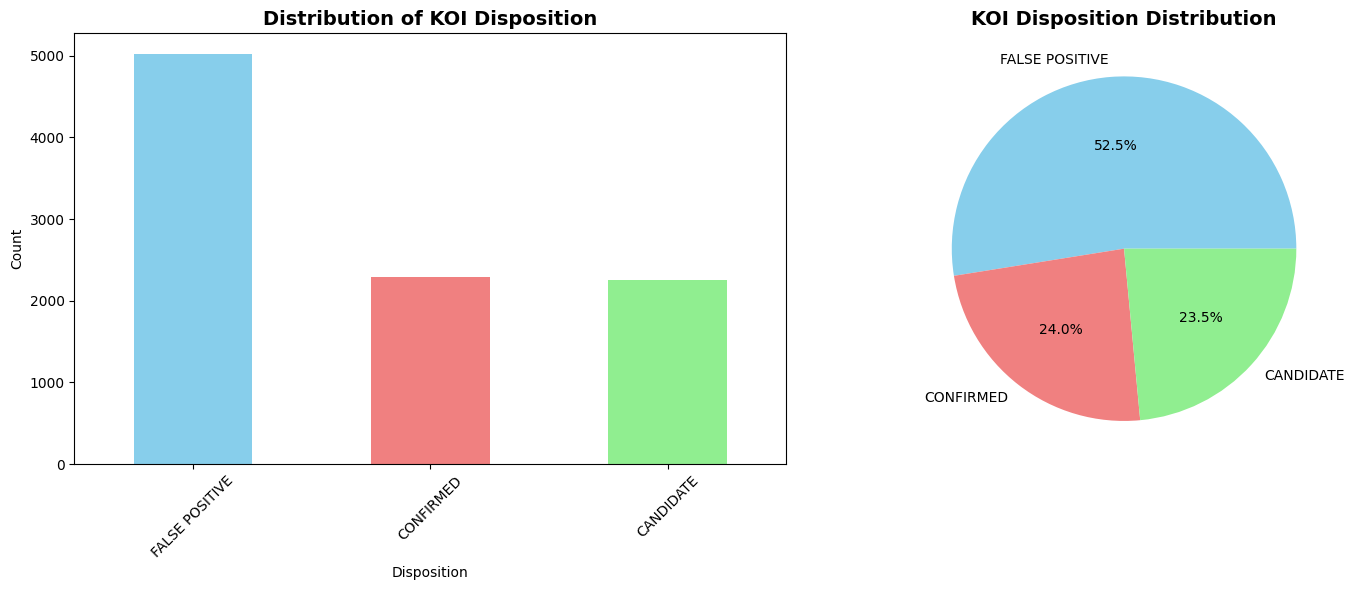


CLASS BALANCE:
Confirmed Exoplanets: 2,293 (24.0%)
False Positives: 5,023 (52.5%)
Candidates: 2,248 (23.5%)


In [3]:
# Analyze target variable distribution
print("KOI DISPOSITION DISTRIBUTION:")
disposition_counts = df['koi_disposition'].value_counts()
print(disposition_counts)
print("\nPercentages:")
print((disposition_counts / len(df) * 100).round(2))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
disposition_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_title('Distribution of KOI Disposition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Disposition')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(disposition_counts.values, labels=disposition_counts.index, autopct='%1.1f%%', 
           colors=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('KOI Disposition Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class balance analysis
confirmed = disposition_counts.get('CONFIRMED', 0)
false_positive = disposition_counts.get('FALSE POSITIVE', 0)
candidate = disposition_counts.get('CANDIDATE', 0)

print("\nCLASS BALANCE:")
print(f"Confirmed Exoplanets: {confirmed:,} ({confirmed/len(df)*100:.1f}%)")
print(f"False Positives: {false_positive:,} ({false_positive/len(df)*100:.1f}%)")
print(f"Candidates: {candidate:,} ({candidate/len(df)*100:.1f}%)")

## Missing Data Analysis

COLUMNS WITH MISSING DATA (36 out of 50):
                Missing Count  Missing Percentage
koi_teq_err2             9564          100.000000
koi_teq_err1             9564          100.000000
kepler_name              7270           76.014220
koi_score                1510           15.788373
koi_steff_err2            483            5.050188
koi_srad_err2             468            4.893350
koi_srad_err1             468            4.893350
koi_steff_err1            468            4.893350
koi_slogg_err2            468            4.893350
koi_slogg_err1            468            4.893350


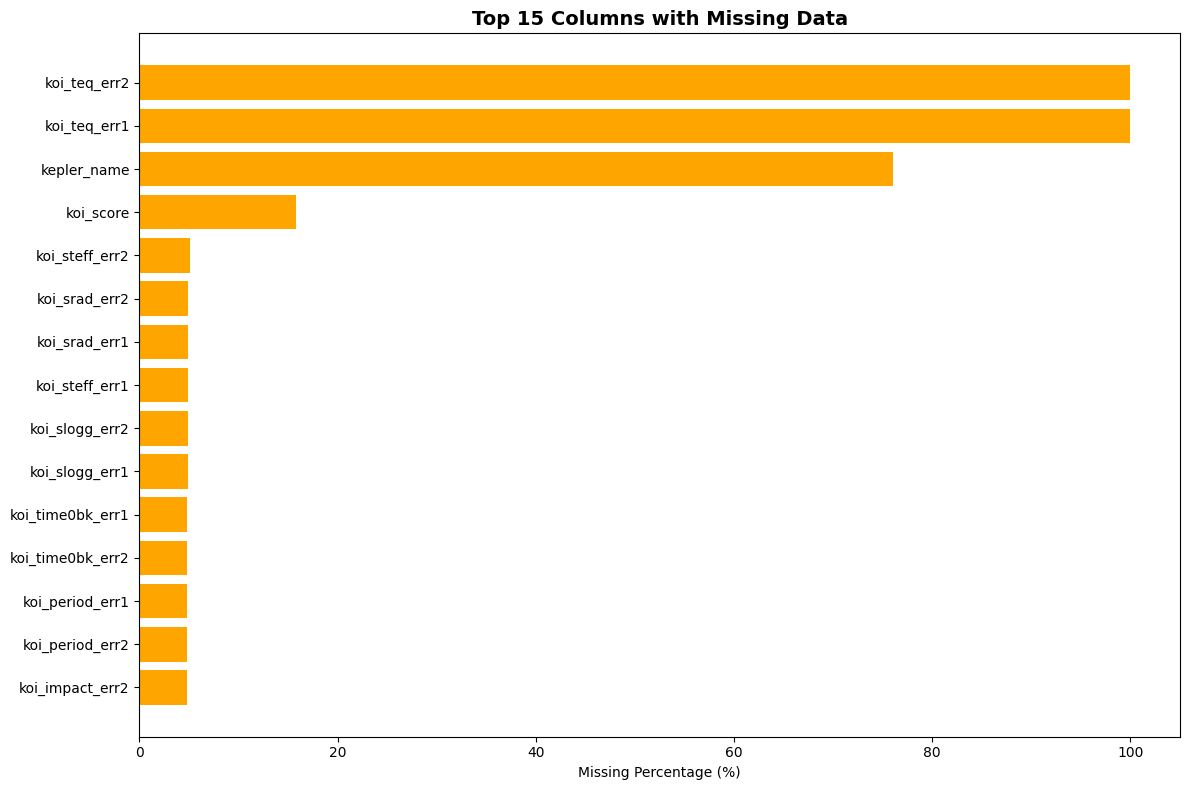


OVERALL DATA COMPLETENESS: 91.5%


In [4]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

# Only show columns with missing data
missing_df = missing_df[missing_df['Missing Count'] > 0]

print(f"COLUMNS WITH MISSING DATA ({len(missing_df)} out of {len(df.columns)}):")
print(missing_df.head(10))

# Visualization
if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = missing_df.head(15)
    plt.barh(range(len(top_missing)), top_missing['Missing Percentage'], color='orange')
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 15 Columns with Missing Data', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print(f"\nOVERALL DATA COMPLETENESS: {((df.size - df.isnull().sum().sum()) / df.size * 100):.1f}%")

## Key Features Analysis

In [5]:
# Define key features for exoplanet detection
key_features = {
    'Orbital Parameters': ['koi_period', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_eccen'],
    'Transit Properties': ['koi_depth', 'koi_duration', 'koi_impact'],
    'Stellar Properties': ['koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag'],
    'Detection Metrics': ['koi_score', 'koi_model_snr']
}

print("KEY FEATURES SUMMARY:")
for category, features in key_features.items():
    print(f"\n{category}:")
    for feature in features:
        if feature in df.columns:
            missing_pct = df[feature].isnull().sum() / len(df) * 100
            print(f"  • {feature}: {missing_pct:.1f}% missing")
        else:
            print(f"  • {feature}: NOT FOUND")

# Statistical summary of key numerical features
all_key_features = [f for features in key_features.values() for f in features if f in df.columns]
numerical_features = [f for f in all_key_features if df[f].dtype in ['float64', 'int64']]

print("\nSTATISTICAL SUMMARY:")
print(df[numerical_features].describe().round(3))

KEY FEATURES SUMMARY:

Orbital Parameters:
  • koi_period: 0.0% missing
  • koi_prad: 3.8% missing
  • koi_sma: NOT FOUND
  • koi_incl: NOT FOUND
  • koi_eccen: NOT FOUND

Transit Properties:
  • koi_depth: 3.8% missing
  • koi_duration: 0.0% missing
  • koi_impact: 3.8% missing

Stellar Properties:
  • koi_steff: 3.8% missing
  • koi_slogg: 3.8% missing
  • koi_srad: 3.8% missing
  • koi_kepmag: 0.0% missing

Detection Metrics:
  • koi_score: 15.8% missing
  • koi_model_snr: 3.8% missing

STATISTICAL SUMMARY:
       koi_period    koi_prad    koi_depth  koi_duration  koi_impact  \
count    9564.000    9201.000     9201.000      9564.000    9201.000   
mean       75.671     102.892    23791.336         5.622       0.735   
std      1334.744    3077.639    82242.683         6.472       3.349   
min         0.242       0.080        0.000         0.052       0.000   
25%         2.734       1.400      159.900         2.438       0.197   
50%         9.753       2.390      421.100         3

## Feature Distributions

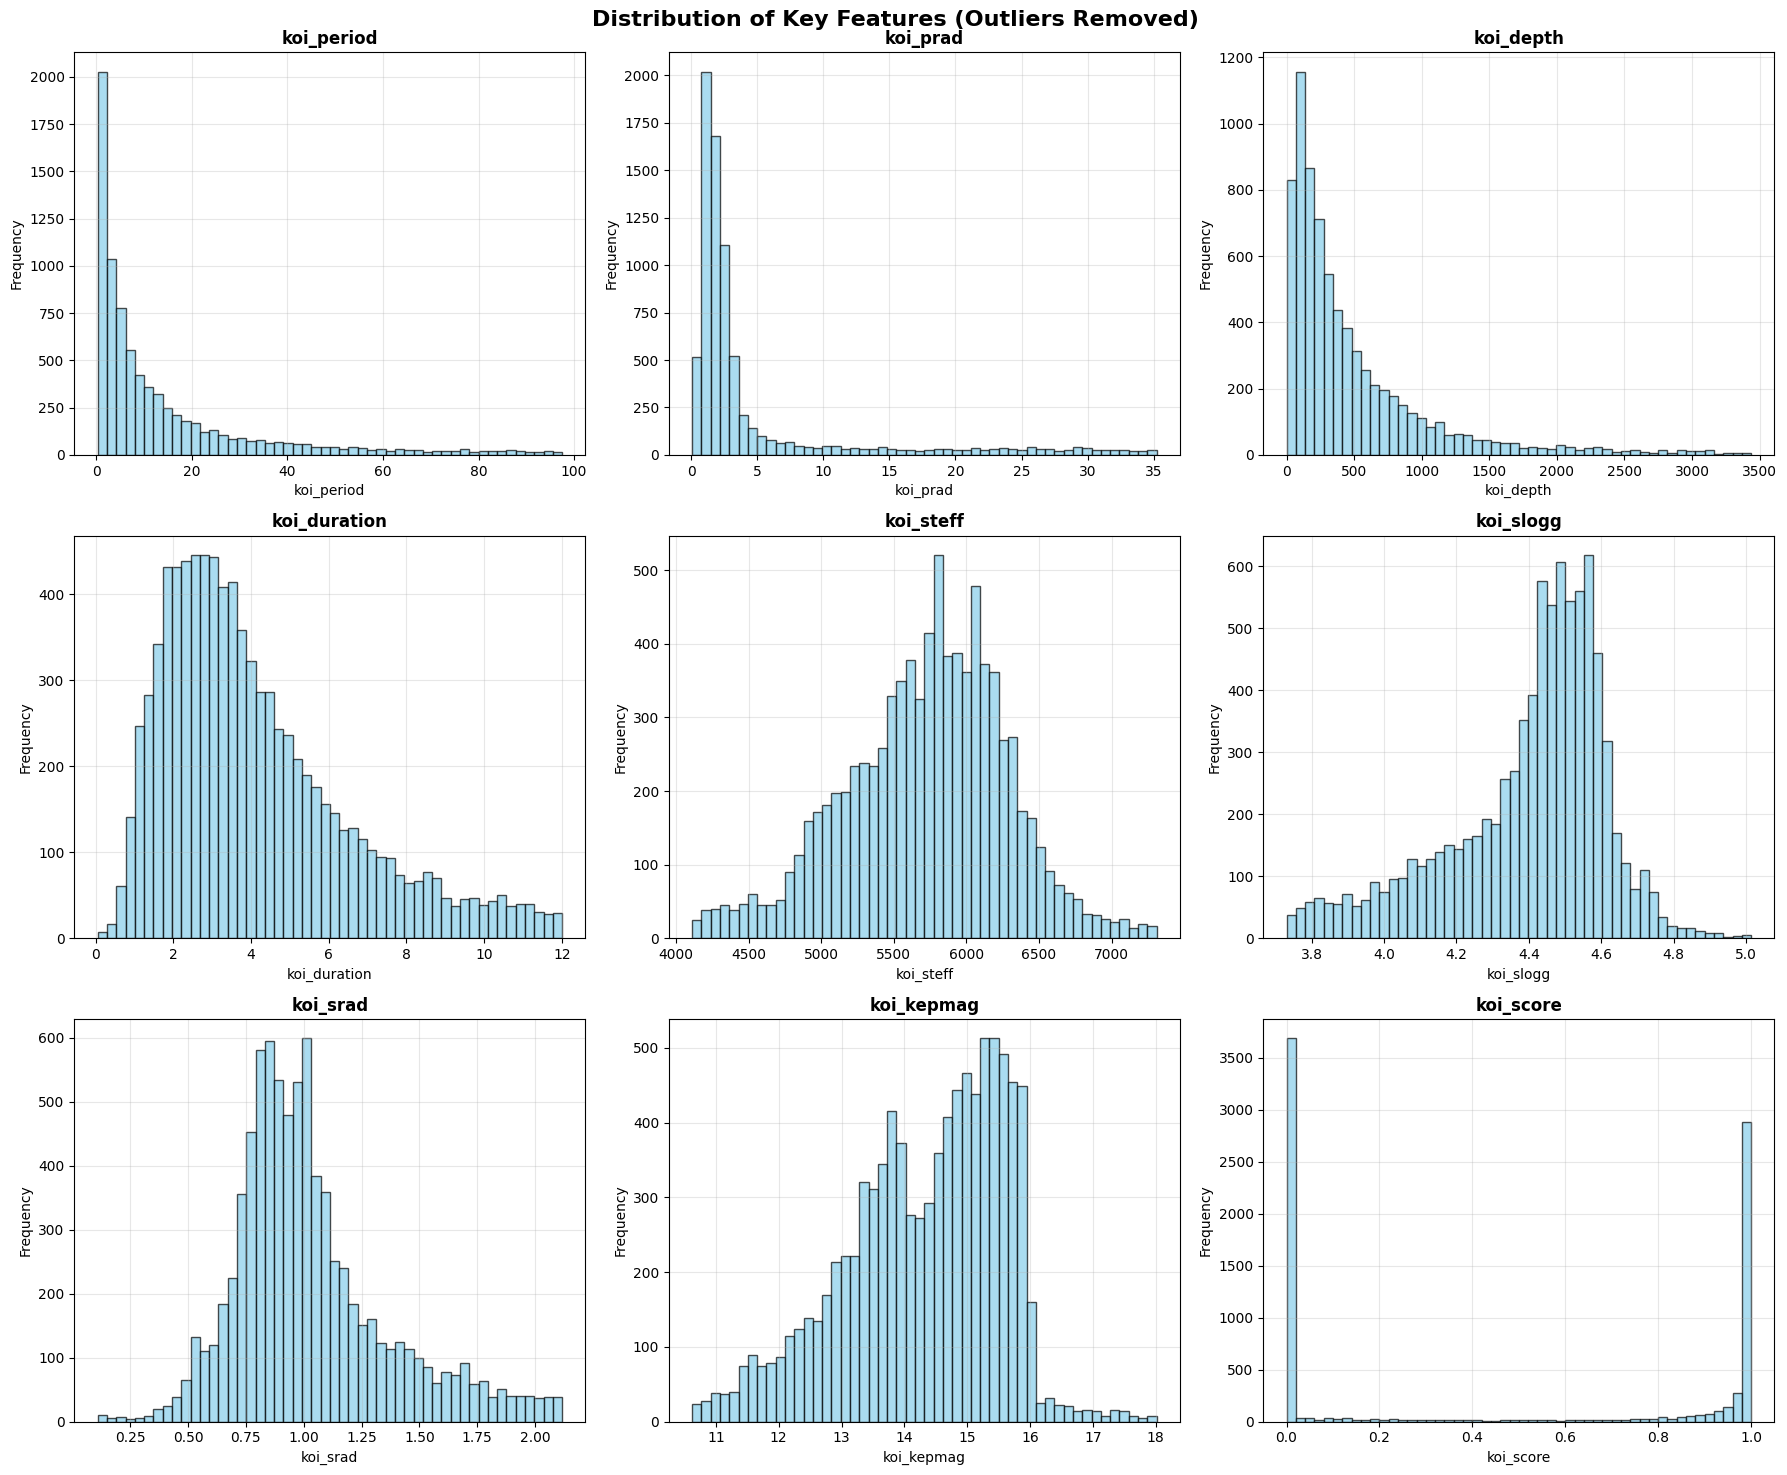

In [6]:
# Create distribution plots for key features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

plot_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_duration', 
                'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_score']

for i, feature in enumerate(plot_features):
    if feature in df.columns and i < len(axes):
        # Remove extreme outliers for better visualization
        data = df[feature].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
            
            axes[i].hist(filtered_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'{feature}', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribution of Key Features (Outliers Removed)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Correlation Analysis

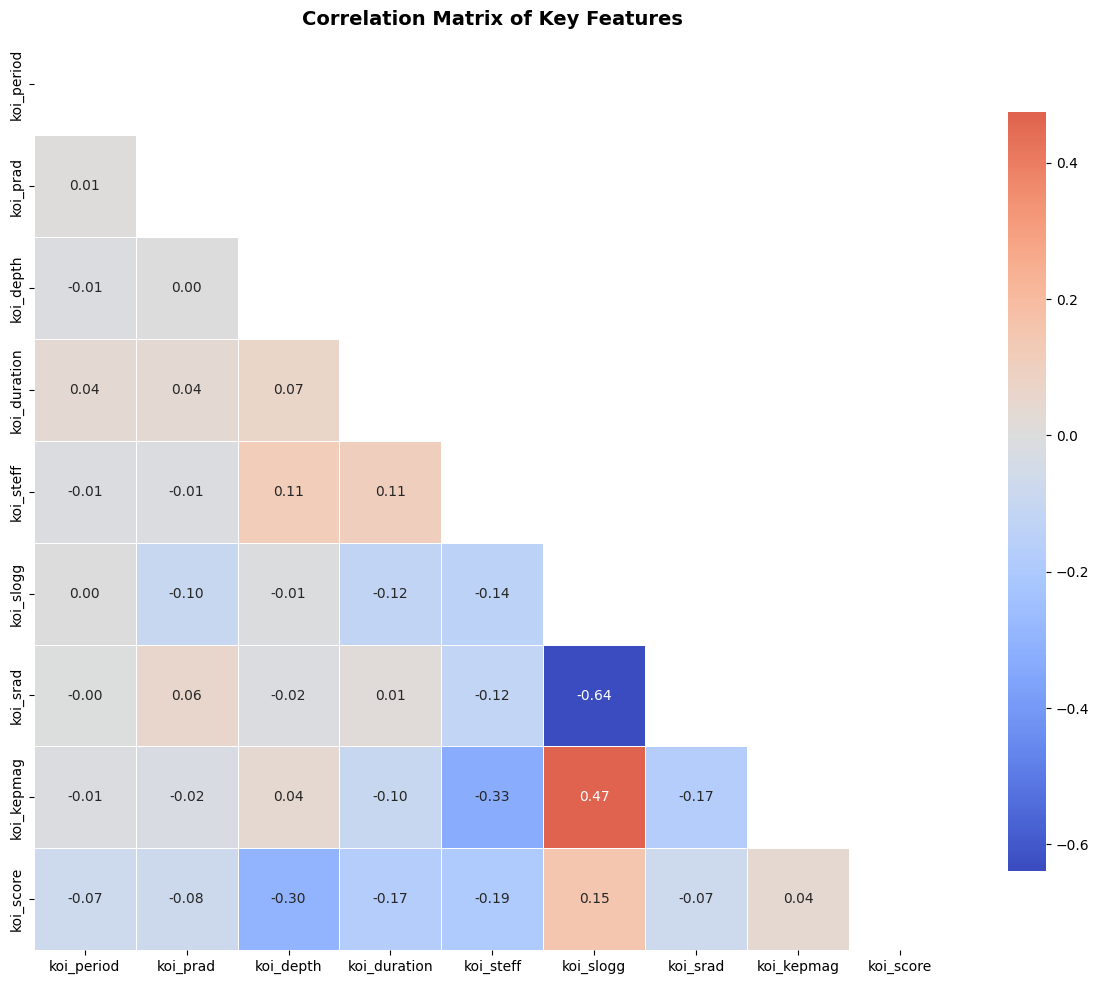

No high correlations (|r| > 0.7) found among key features


In [7]:
# Correlation analysis of key features
corr_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_duration', 
                'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_score']
corr_features = [f for f in corr_features if f in df.columns]

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix of Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find high correlations
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

if high_corr_pairs:
    print("HIGH CORRELATIONS (|r| > 0.7):")
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")
else:
    print("No high correlations (|r| > 0.7) found among key features")

## Features by Disposition

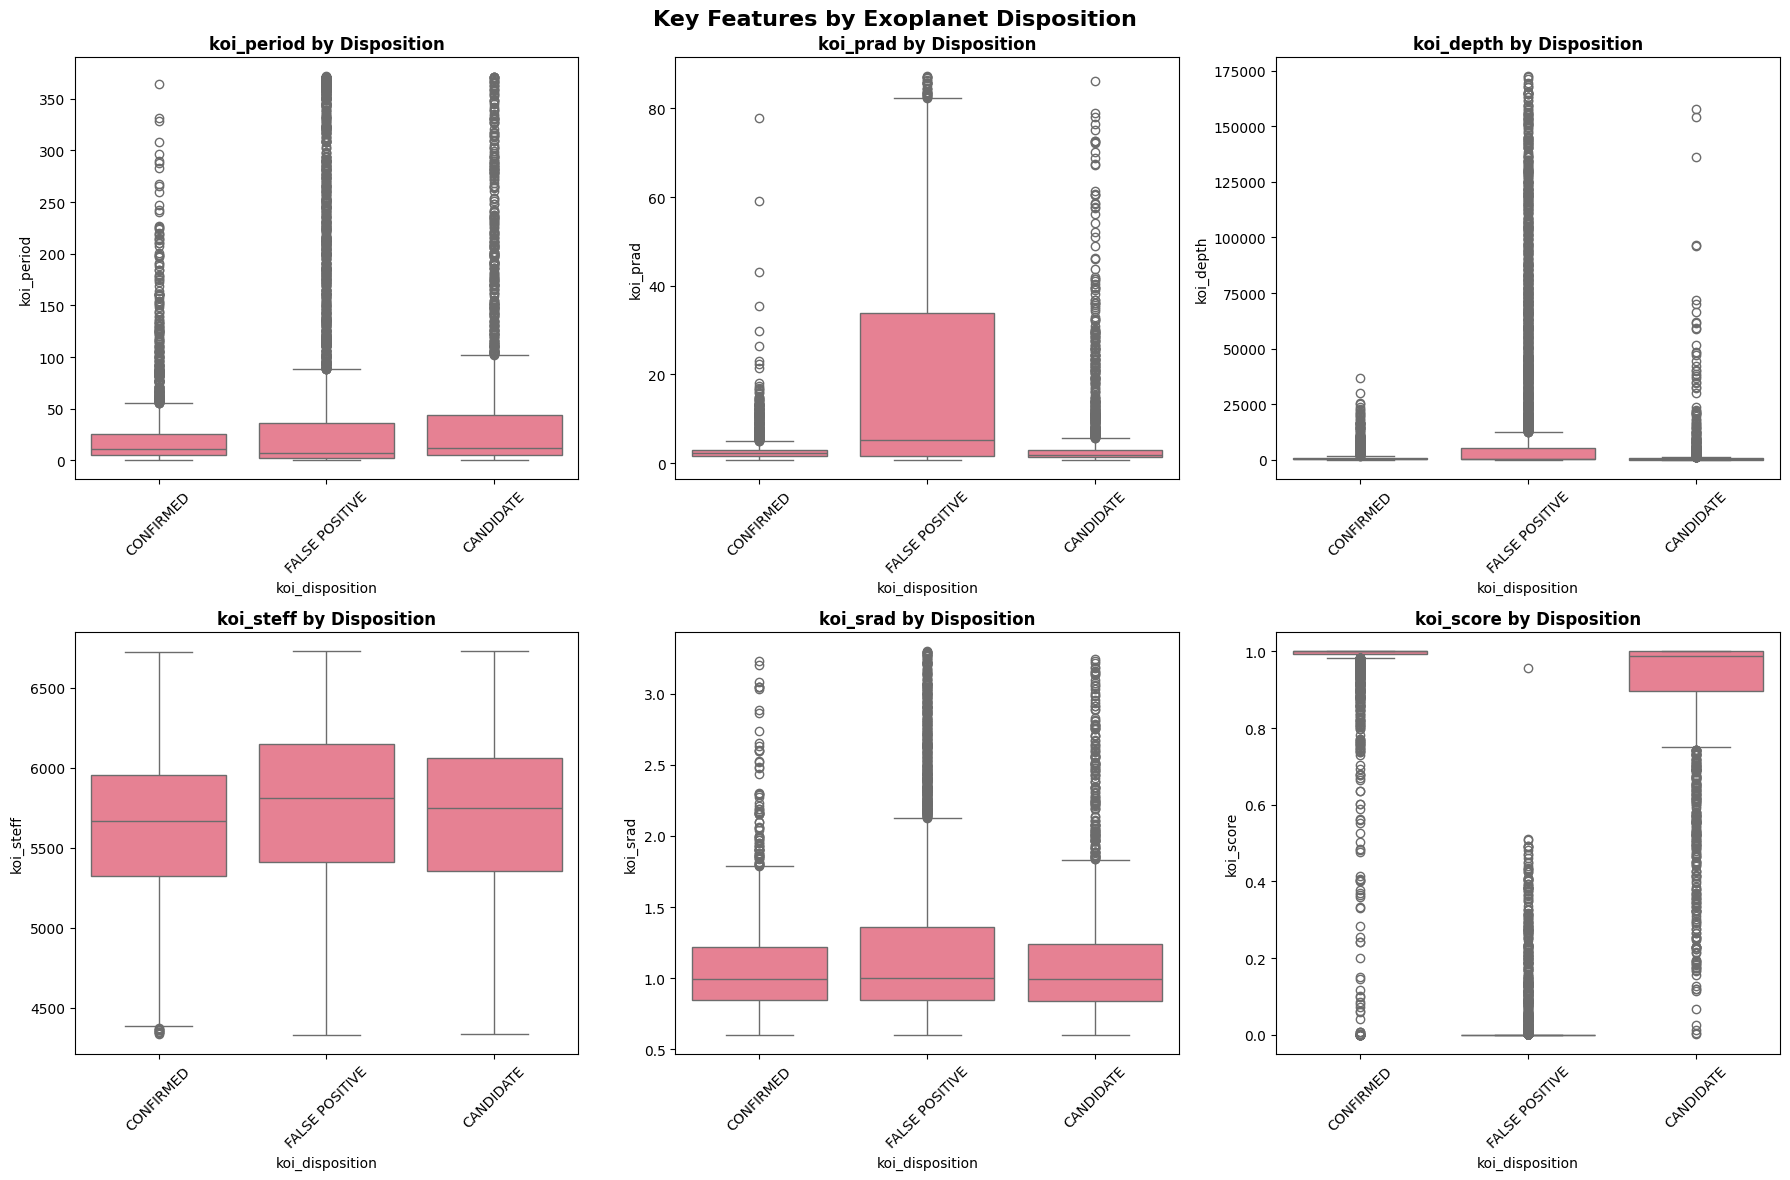

FEATURE STATISTICS BY DISPOSITION:

koi_period:
                 count     mean       std  median
koi_disposition                                  
CANDIDATE         2248  130.524  2744.156  13.279
CONFIRMED         2293   27.063    54.019  11.323
FALSE POSITIVE    5023   73.312   139.114   6.383

koi_prad:
                 count     mean       std  median
koi_disposition                                  
CANDIDATE         2185   15.931   316.937    1.78
CONFIRMED         2292    2.872     3.361    2.17
FALSE POSITIVE    4724  191.642  4288.087    6.85

koi_score:
                 count   mean    std  median
koi_disposition                             
CANDIDATE         1797  0.900  0.183   0.987
CONFIRMED         2281  0.963  0.144   1.000
FALSE POSITIVE    3976  0.015  0.062   0.000


In [8]:
# Analyze key features by disposition
main_dispositions = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']
df_filtered = df[df['koi_disposition'].isin(main_dispositions)]

# Box plots for key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

box_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_steff', 'koi_srad', 'koi_score']

for i, feature in enumerate(box_features):
    if feature in df.columns and i < len(axes):
        # Remove extreme outliers for better visualization
        data = df_filtered[feature].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.05)
            Q3 = data.quantile(0.95)
            
            plot_data = df_filtered[(df_filtered[feature] >= Q1) & (df_filtered[feature] <= Q3)]
            
            sns.boxplot(data=plot_data, x='koi_disposition', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} by Disposition', fontweight='bold')
            axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Key Features by Exoplanet Disposition', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistical comparison
print("FEATURE STATISTICS BY DISPOSITION:")
for feature in ['koi_period', 'koi_prad', 'koi_score']:
    if feature in df.columns:
        print(f"\n{feature}:")
        stats_by_disp = df_filtered.groupby('koi_disposition')[feature].agg(['count', 'mean', 'std', 'median'])
        print(stats_by_disp.round(3))

## Key Insights & Summary

In [9]:
print("="*60)
print("KEY INSIGHTS & SUMMARY")
print("="*60)

total_objects = len(df)
confirmed_planets = disposition_counts.get('CONFIRMED', 0)
false_positives = disposition_counts.get('FALSE POSITIVE', 0)
candidates = disposition_counts.get('CANDIDATE', 0)

print("\nDATASET SUMMARY:")
print(f"  • Total KOIs: {total_objects:,}")
print(f"  • Confirmed Exoplanets: {confirmed_planets:,} ({confirmed_planets/total_objects*100:.1f}%)")
print(f"  • False Positives: {false_positives:,} ({false_positives/total_objects*100:.1f}%)")
print(f"  • Candidates: {candidates:,} ({candidates/total_objects*100:.1f}%)")

print("\nDATA QUALITY:")
missing_cols = df.isnull().sum()
cols_with_missing = (missing_cols > 0).sum()
print(f"  • Columns with missing data: {cols_with_missing}/{len(df.columns)}")
print(f"  • Overall completeness: {((df.size - df.isnull().sum().sum()) / df.size * 100):.1f}%")

print("\nFEATURE TYPES:")
print(f"  • Numerical features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"  • Categorical features: {len(df.select_dtypes(include=['object']).columns)}")

print("\nMODELING RECOMMENDATIONS:")
print("  • Primary task: Binary classification (Confirmed vs False Positive)")
print("  • Secondary task: Multi-class (include Candidates)")
print("  • Handle missing data in key orbital/stellar features")
print("  • Consider feature engineering from error columns")
print("  • Address class imbalance if needed")
print("  • Recommended algorithms: Random Forest, XGBoost, Neural Networks")

print("\nDOMAIN INSIGHTS:")
print("  • Transit depth and duration are key discriminators")
print("  • Stellar properties help distinguish real planets")
print("  • KOI score is a strong predictor but may cause data leakage")
print("  • False positives often have stellar contamination flags")

print("\nEDA COMPLETE - Ready for preprocessing and modeling!")

KEY INSIGHTS & SUMMARY

DATASET SUMMARY:
  • Total KOIs: 9,564
  • Confirmed Exoplanets: 2,293 (24.0%)
  • False Positives: 5,023 (52.5%)
  • Candidates: 2,248 (23.5%)

DATA QUALITY:
  • Columns with missing data: 36/50
  • Overall completeness: 91.5%

FEATURE TYPES:
  • Numerical features: 45
  • Categorical features: 5

MODELING RECOMMENDATIONS:
  • Primary task: Binary classification (Confirmed vs False Positive)
  • Secondary task: Multi-class (include Candidates)
  • Handle missing data in key orbital/stellar features
  • Consider feature engineering from error columns
  • Address class imbalance if needed
  • Recommended algorithms: Random Forest, XGBoost, Neural Networks

DOMAIN INSIGHTS:
  • Transit depth and duration are key discriminators
  • Stellar properties help distinguish real planets
  • KOI score is a strong predictor but may cause data leakage
  • False positives often have stellar contamination flags

EDA COMPLETE - Ready for preprocessing and modeling!


# Data Preprocessing

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def preprocess_no_leak(path="data/kepler_exoplanets.csv", target_col="koi_disposition", task="binary", test_size=0.2, random_state=42):
    df = pd.read_csv(path)
    # keep only CONFIRMED / FALSE POSITIVE for binary
    if task == "binary":
        mapping = {"CONFIRMED": 1, "FALSE POSITIVE": 0}
        mask = df[target_col].astype(str).str.upper().isin(mapping.keys())
        df = df[mask].copy()
        df["target"] = df[target_col].str.upper().map(mapping)
    else:
        raise ValueError("task='binary' expected for this helper")

    # drop identifier cols (if present)
    drop_cols = ["rowid", "kepid", "kepoi_name", "kepler_name", target_col]
    df = df.drop(columns=[c for c in drop_cols if c in df.columns])

    X = df.drop(columns=["target"])
    y = df["target"].astype(int)

    # infer numeric / categorical
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

    # build column transformer pipeline: impute -> scale for numeric, impute -> onehot for categorical
    num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    preproc = ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ], remainder="drop")

    # split BEFORE fitting transformers (very important)
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # fit on train only
    X_train = preproc.fit_transform(X_train_raw)
    X_test = preproc.transform(X_test_raw)

    return X_train, X_test, y_train.values, y_test.values, preproc

# usage
X_train, X_test, y_train, y_test, preproc = preprocess_no_leak(path="data/kepler_exoplanets.csv")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", pd.Series(y_train).value_counts(normalize=True))


X_train shape: (5852, 46)
y_train distribution:
 0    0.686603
1    0.313397
Name: proportion, dtype: float64


In [12]:
import numpy as np
print("y_train unique / counts:", np.unique(y_train, return_counts=True))
print("Any NaNs in X_train/X_test?", np.isnan(X_train).any(), np.isnan(X_test).any())
# check constants
print("Any constant columns in X_train?", np.all(X_train == X_train[0,:], axis=0).sum())


y_train unique / counts: (array([0, 1]), array([4018, 1834]))
Any NaNs in X_train/X_test? False False
Any constant columns in X_train? 0


# ANN

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers
from sklearn.utils import class_weight

# compute class weights
classes = np.unique(y_train)
cw = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {int(c): float(w) for c, w in zip(classes, cw)}
print("class weights:", class_weight_dict)

# init bias to log(pos/neg)
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
init_bias = np.log((pos + 1e-8) / (neg + 1e-8))

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', bias_initializer=initializers.Constant(init_bias))
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=64, callbacks=[early_stop],
                    class_weight=class_weight_dict, verbose=2)


2025-10-02 00:51:07.716545: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-02 00:51:08.089976: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-02 00:51:09.463717: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


class weights: {0: 0.7282229965156795, 1: 1.5954198473282444}


I0000 00:00:1759346470.117945    8759 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2142 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


2025-10-02 00:51:11.471260: I external/local_xla/xla/service/service.cc:163] XLA service 0x78cf1c00ad00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-02 00:51:11.471277: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-10-02 00:51:11.502221: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-02 00:51:11.675889: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
2025-10-02 00:51:11.774777: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-02 00:51:11.

92/92 - 10s - 113ms/step - accuracy: 0.7039 - auc: 0.7162 - loss: 0.6943 - val_accuracy: 0.8791 - val_auc: 0.9787 - val_loss: 0.4655
Epoch 2/100
92/92 - 0s - 3ms/step - accuracy: 0.8845 - auc: 0.9454 - loss: 0.4650 - val_accuracy: 0.9802 - val_auc: 0.9930 - val_loss: 0.3172
Epoch 3/100
92/92 - 0s - 2ms/step - accuracy: 0.9487 - auc: 0.9848 - loss: 0.3100 - val_accuracy: 0.9857 - val_auc: 0.9957 - val_loss: 0.2086
Epoch 4/100
92/92 - 0s - 2ms/step - accuracy: 0.9689 - auc: 0.9908 - loss: 0.2141 - val_accuracy: 0.9884 - val_auc: 0.9968 - val_loss: 0.1413
Epoch 5/100
92/92 - 0s - 2ms/step - accuracy: 0.9774 - auc: 0.9937 - loss: 0.1568 - val_accuracy: 0.9898 - val_auc: 0.9974 - val_loss: 0.1016
Epoch 6/100
92/92 - 0s - 2ms/step - accuracy: 0.9815 - auc: 0.9951 - loss: 0.1240 - val_accuracy: 0.9911 - val_auc: 0.9977 - val_loss: 0.0792
Epoch 7/100
92/92 - 0s - 3ms/step - accuracy: 0.9834 - auc: 0.9955 - loss: 0.1051 - val_accuracy: 0.9918 - val_auc: 0.9980 - val_loss: 0.0665
Epoch 8/100
92/

In [14]:
probs = model.predict(X_test[:200]).ravel()
print("probs summary:", probs.min(), probs.mean(), probs.max())
print("pred fraction (threshold 0.5):", (probs > 0.5).mean())


2025-10-02 00:51:59.653017: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-02 00:52:00.490499: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 100 bytes spill stores, 100 bytes spill loads



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
probs summary: 3.7657473e-16 0.3379747 0.99999857
pred fraction (threshold 0.5): 0.335


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
probs_rf = rf.predict_proba(X_test)[:,1]
print("RF AUC:", roc_auc_score(y_test, probs_rf))
print(classification_report(y_test, preds))


RF AUC: 0.9951907131011608
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1005
           1       1.00      0.98      0.99       459

    accuracy                           0.99      1464
   macro avg       1.00      0.99      0.99      1464
weighted avg       0.99      0.99      0.99      1464



In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
aucs = cross_val_score(rf, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
print("CV AUCs:", aucs, "Mean:", np.mean(aucs))


CV AUCs: [0.99982546 0.99974752 0.99974003 0.99889719 0.99568546] Mean: 0.9987791307862877


## MlFlow Tracking

In [25]:
import mlflow

mlflow.set_tracking_uri("https://dagshub.com/laksh-krishna-sharma/exovision.mlflow")
mlflow.set_experiment("kepler_exoplanets")


<Experiment: artifact_location='mlflow-artifacts:/441718dbe56a4790ad3ab5a08a601cd4', creation_time=1757018958543, experiment_id='0', last_update_time=1757018958543, lifecycle_stage='active', name='kepler_exoplanets', tags={}>

In [28]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mlflow.set_tracking_uri("https://dagshub.com/laksh-krishna-sharma/exovision.mlflow")
mlflow.set_experiment("kepler_exoplanets")

with mlflow.start_run(run_name="RandomForest"):
    rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    mlflow.log_params(rf.get_params())
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred)
    })


🏃 View run RandomForest at: https://dagshub.com/laksh-krishna-sharma/exovision.mlflow/#/experiments/0/runs/c3f00335f2cb48a1b9a7991e21628877
🧪 View experiment at: https://dagshub.com/laksh-krishna-sharma/exovision.mlflow/#/experiments/0


In [31]:
import joblib

# Save model locally
joblib.dump(rf, "rf_model.joblib")

# Log as artifact
mlflow.log_artifact("rf_model.joblib", artifact_path=".models")
